# **Projet 6 - Parcours Data Scientist - Openclassroom**
### *Adrien Aprile*
## **Partie II : Test des modèles**

### *Import des données* 

In [0]:
import os
from scipy import sparse
import numpy as np
import pandas as pd
import csv
os.chdir(r"C:\Users\adrien\NOTEBOOK Python\Projet_6\Export")

X = sparse.load_npz("X_matrix.npz")
y = sparse.load_npz("y_matrix.npz")
X_lda = sparse.load_npz("X_matrix_lda.npz")
liste_tags = pd.read_csv("tags.csv",sep=",",encoding = "ISO-8859-1")
liste_tags = liste_tags.columns
X_vocab = pd.read_csv("Vocabulary.csv",sep=",",encoding = "ISO-8859-1")
X_vocab = X_vocab.columns
X_vocab_lda = pd.read_csv("Vocabulary_lda.csv",sep=",",encoding = "ISO-8859-1")
X_vocab_lda = X_vocab_lda.columns
print(X.shape)
print(y.shape)

(47303, 7543)
(47303, 9179)


In [0]:
#Selection de tags ( 30 premiers ) :
y_selected = y[:,range(0,30)]

In [0]:
#On recurere les index des lignes taggé par au moins 1 des n premiers tags :
liste_lignes = y_selected.sum(axis=1)
index_lignes_tagger = []
for e in range(0,len(liste_lignes)):
    if liste_lignes[e]>0:
        index_lignes_tagger.append(e)

In [0]:
#On filtre les matrice X et y :
X_selected = X[index_lignes_tagger]
y_selected = y_selected[index_lignes_tagger]
print("X shape :",X_selected.shape)
print("y shape :",y_selected.shape)

X shape : (33161, 7543)
y shape : (33161, 30)


In [0]:
y_selected=y_selected.toarray()

In [0]:
33161 /47303

0.7010337610722365

### *train/test split :*

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_selected,y_selected, test_size=0.2)

In [0]:
y_test.sum(axis=0)

array([1201,  968,  698,  547,  534,  416,  359,  383,  336,  327,  252,
        227,  211,  212,  203,  199,  174,  164,  153,  147,  149,  145,
        154,  156,  155,  137,  137,  131,  128,  119], dtype=int32)

##  **Test de modèles:**
### **Partie supervisée :**

### *Random Forest Classifier:*

In [0]:
# Grid search random forest 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

max_depth = [10,20,25]
max_feature = [0.7,0.8]
n_estimators = [20,30,40,100]

param = {'max_depth': max_depth,
 'max_features': max_feature,
 'n_estimators': n_estimators,
}

clf = RandomForestClassifier()
rf_random = GridSearchCV(estimator = clf, param_grid= param, cv = 2, verbose=2,scoring='f1_micro')
rf_random.fit(X_train,y_train)
print(rf_random.best_params_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] max_depth=10, max_features=0.7, n_estimators=20 .................
[CV] .. max_depth=10, max_features=0.7, n_estimators=20, total=  25.6s
[CV] max_depth=10, max_features=0.7, n_estimators=20 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.4s remaining:    0.0s


[CV] .. max_depth=10, max_features=0.7, n_estimators=20, total=  25.8s
[CV] max_depth=10, max_features=0.7, n_estimators=30 .................
[CV] .. max_depth=10, max_features=0.7, n_estimators=30, total=  41.3s
[CV] max_depth=10, max_features=0.7, n_estimators=30 .................
[CV] .. max_depth=10, max_features=0.7, n_estimators=30, total=  39.4s
[CV] max_depth=10, max_features=0.7, n_estimators=40 .................
[CV] .. max_depth=10, max_features=0.7, n_estimators=40, total=  55.7s
[CV] max_depth=10, max_features=0.7, n_estimators=40 .................
[CV] .. max_depth=10, max_features=0.7, n_estimators=40, total=  55.3s
[CV] max_depth=10, max_features=0.7, n_estimators=100 ................
[CV] . max_depth=10, max_features=0.7, n_estimators=100, total= 2.2min
[CV] max_depth=10, max_features=0.7, n_estimators=100 ................
[CV] . max_depth=10, max_features=0.7, n_estimators=100, total= 2.2min
[CV] max_depth=10, max_features=0.8, n_estimators=20 .................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 112.3min finished


{'max_depth': 25, 'max_features': 0.8, 'n_estimators': 100}


#### Hyperparamètre Random forest : max depth= 25, max_features = 0.8, n_estimators = 100

In [0]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

clf = RandomForestClassifier(max_depth = 25,max_features = 0.8,n_estimators = 100,n_jobs=-1)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
# On récupère les prédictions de notre modèle :
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [0]:
def proba_to_pred(matrice,proba):
    prediction_temp = np.zeros((len(matrice[0]),len(matrice)))
    for i in range(0,len(matrice)):
        for j in range(0,len(matrice[i])):
            if matrice[i][j][1]>proba:
                prediction_temp[j,i] = 1
    return prediction_temp

def proba_positive_matric(matrice):
    proba_temp = np.zeros((len(matrice[0]),len(matrice)))
    for i in range(0,len(matrice)):
        for j in range(0,len(matrice[i])):
            if proba_temp[j].sum()<4:
                proba_temp[j,i] = matrice[i][j][1]
    return proba_temp
def find_best_limite(y_pred_probs,y_test_matrice):
    max_f1 = 0
    best_limite = 0
    pred =[]
    for pas in np.arange(0.0, 0.6, 0.01):
        pred = proba_to_pred(y_pred_probs,pas)
        if f1_score(pred,y_test_matrice,average='micro')> max_f1:
            best_limite = pas
            max_f1 = f1_score(pred,y_test_matrice,average='micro')
    return max_f1, best_limite

In [0]:
# Fonction pour trouver le meilleur 
m, esp = find_best_limite(y_pred_proba,y_test)
print("best f1 score :",m,"pour esp =",esp)

best f1 score : 0.6116879980680994 pour esp = 0.29


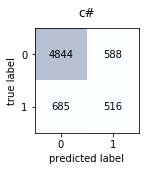

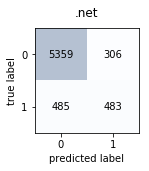

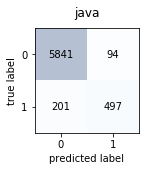

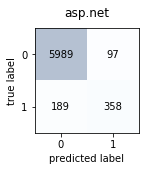

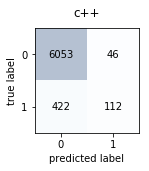

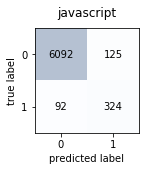

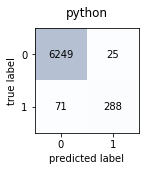

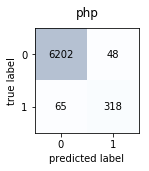

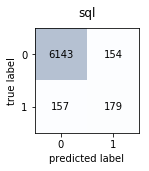

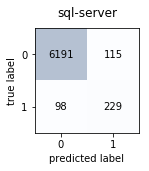

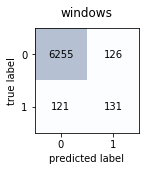

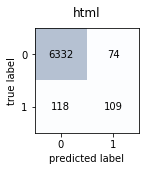

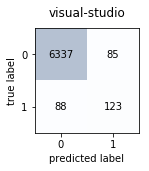

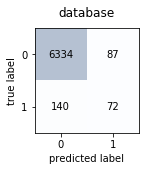

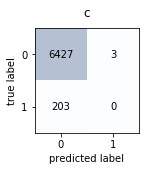

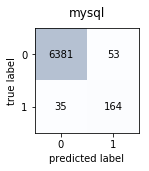

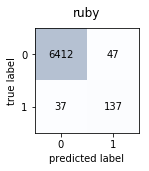

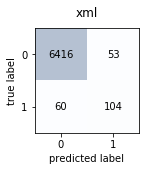

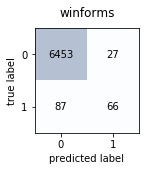

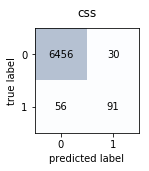

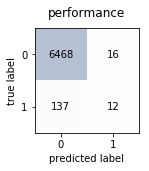

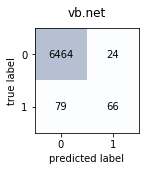

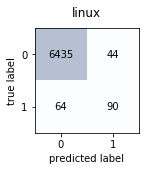

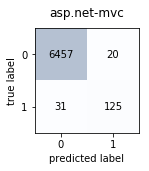

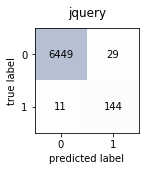

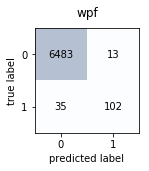

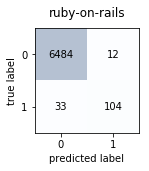

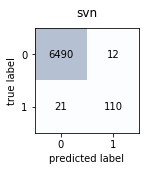

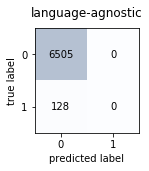

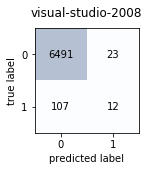

In [0]:
#Best prediction : 
y_best_prediction = proba_to_pred(y_pred_proba,esp)
os.chdir(r"C:\Users\adrien\NOTEBOOK Python\Projet_6\Export\MC randomforest")
# Matrice de confusion du modèle : 
for i in range(0,30):
    titre = liste_tags[i]
    fichier = "Confusion matrix tags : "+liste_tags[i] +".png"
    fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(y_test[:,i], y_best_prediction[:,i]))
    plt.title(titre)
    plt.tight_layout()
    plt.savefig(str(liste_tags[i])+".png")
    plt.show() 

### *One Versus Rest linear SVC:* 

In [0]:
#### ONE VERSUS REST + SVC ####
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

clf_svc = LinearSVC()
clf_ovr = OneVsRestClassifier(clf_svc)
clf_ovr.fit(X_train,y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [0]:
y_pred_ovr = clf_ovr.predict(X_test)
f1_score(y_pred_ovr,y_test,average='micro')

0.6344907258840896

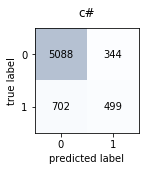

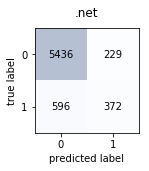

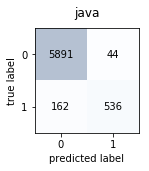

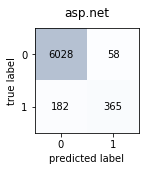

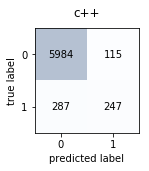

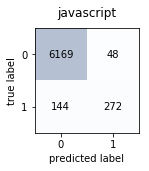

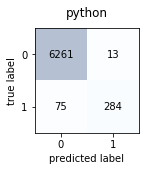

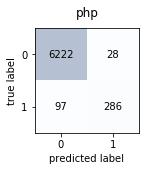

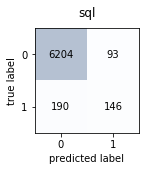

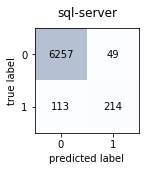

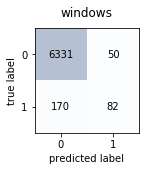

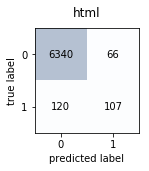

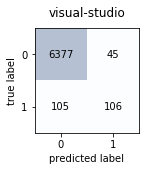

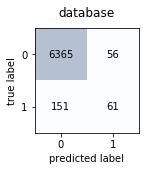

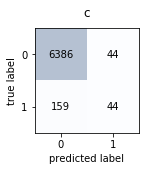

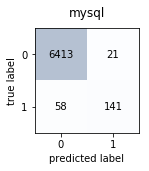

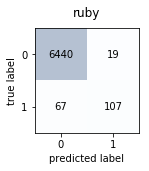

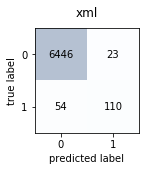

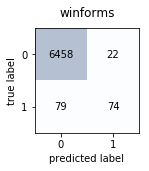

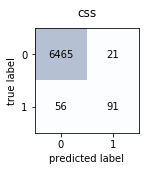

In [0]:
# Matrice de confusion du modèle : 
os.chdir(r"C:\Users\adrien\NOTEBOOK Python\Projet_6\Export\MC svc")
for i in range(0,20):
    titre = liste_tags[i]
    fichier = liste_tags[i] +".png"
    fig, ax = plot_confusion_matrix(conf_mat=metrics.confusion_matrix(y_test[:,i], y_pred_ovr[:,i]))
    plt.title(titre)
    plt.tight_layout()
    plt.savefig(str(liste_tags[i])+".png")
    plt.show()

### **Partie non supervisée :**

In [0]:
# Fonctions d'affichage :
def get_keys(topic_matrix):
    keys = []
    for i in range(topic_matrix.shape[0]):
        keys.append(topic_matrix[i].argmax())
    return keys
def get_words_topics(model, feature_names, no_top_words):
    tab = []
    for topic_idx, topic in enumerate(model.components_):
        tab.append(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
def display_topics(model, feature_names, no_top_words,model_matrix,key_count_model):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d :" % (topic_idx),"Count = %d" % (key_count_model[topic_idx]))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

### LDA avec les variables du tfidf utilisé dans la partie supervisée

In [0]:
# Algorithme LDA 20 topics:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 20
lda_model = LatentDirichletAllocation(n_components=n_topics,learning_method='online',random_state=0)
lda_model_matrix =lda_model.fit_transform(X)

keys = get_keys(lda_model_matrix)
df_keys = pd.DataFrame({'keys': keys})
keys_count = df_keys['keys'].value_counts()
categorie = get_words_topics(lda_model,X_vocab , 2)

In [0]:
#Affichage des 10 premiers mot pour chaque topics :
no_top_words = 10
display_topics(lda_model, X_vocab, no_top_words,lda_model_matrix,keys_count)

Topic 0 : Count = 117
table column rail row ruby key primary datatable primary key cell
Topic 1 : Count = 5
decimal float double simplest way precision simplest currency workbook float point lambda
Topic 2 : Count = 5920
file run window service java command server process script php
Topic 3 : Count = 25174
application net file project code test web need user know
Topic 4 : Count = 28
lisp anybody know doe anybody doe anybody know anybody functional timer haskell macro curl
Topic 5 : Count = 12
regex expression regular expression regular boost stl regexp rat editable use regular
Topic 6 : Count = 1805
control page event button form click item bind property wpf
Topic 7 : Count = 33
model self upload view pattern controller def singleton design pattern chrome
Topic 8 : Count = 1175
server svn connection password database sql http store report repository
Topic 9 : Count = 18
ip address socket ip address packet country castle jboss tcp len
Topic 10 : Count = 26
iphone mobile device window m

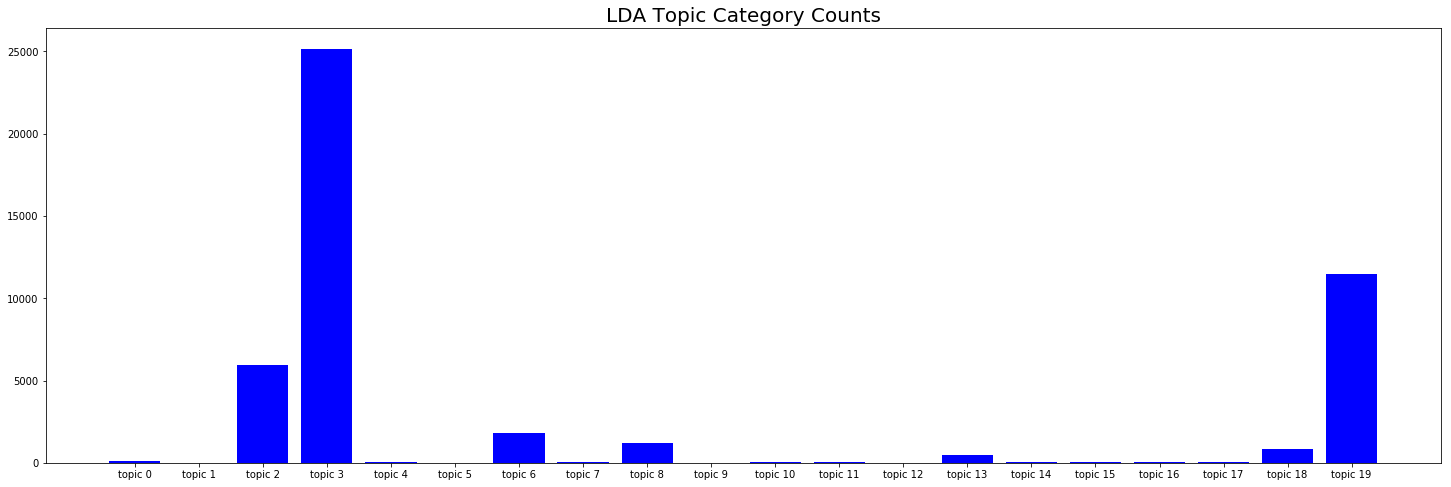

In [0]:
topics_no = []
for i in range(0,20):
    topics_no.append(" ".join(["topic",str(i)]))

graph_count = keys_count.sort_index()

fig, ax = plt.subplots(figsize=(25,8))
for name, count in zip(topics_no,graph_count):
    ax.bar(name,count,color="b")
ax.set_title('LDA Topic Category Counts',fontsize=20)
plt.savefig("topic count.png")
plt.show()

#### On observe que les topics sont très inégales

### LDA avec un countvectorizer (min_df = 200, max_df = 5%) : 

In [0]:
# Algorithme LDA 20 topics:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 20
lda_model = LatentDirichletAllocation(n_components=n_topics,learning_method='online',random_state=0)
lda_model_matrix =lda_model.fit_transform(X_lda)

keys = get_keys(lda_model_matrix)
df_keys = pd.DataFrame({'keys': keys})
keys_count = df_keys['keys'].value_counts()
categorie = get_words_topics(lda_model,X_vocab_lda , 2)

In [0]:
#Affichage des 10 premiers mot pour chaque topics :
no_top_words = 10
display_topics(lda_model, X_vocab_lda, no_top_words,lda_model_matrix,keys_count)

Topic 0 : Count = 4026
model interface language design record domain password learn level pattern
Topic 1 : Count = 1961
xml document element style resource format jquery title schema comment
Topic 2 : Count = 1169
save org svn cache parameter eclipse release repository screen remote
Topic 3 : Count = 2354
int instance self difference node define label integer generic compiler
Topic 4 : Count = 1033
service thread client dll www collection replace http www web service src
Topic 5 : Count = 2647
key exception view path true throw color false task catch
Topic 6 : Count = 1384
field input button variable search ruby response box lib day
Topic 7 : Count = 4383
memory custom report character performance word product byte convert single
Topic 8 : Count = 1220
command copy share config template entity limit tab configuration upload
Topic 9 : Count = 1977
python row sql server mysql db long import linq count statement
Topic 10 : Count = 1475
foo static var void attribute browser header private

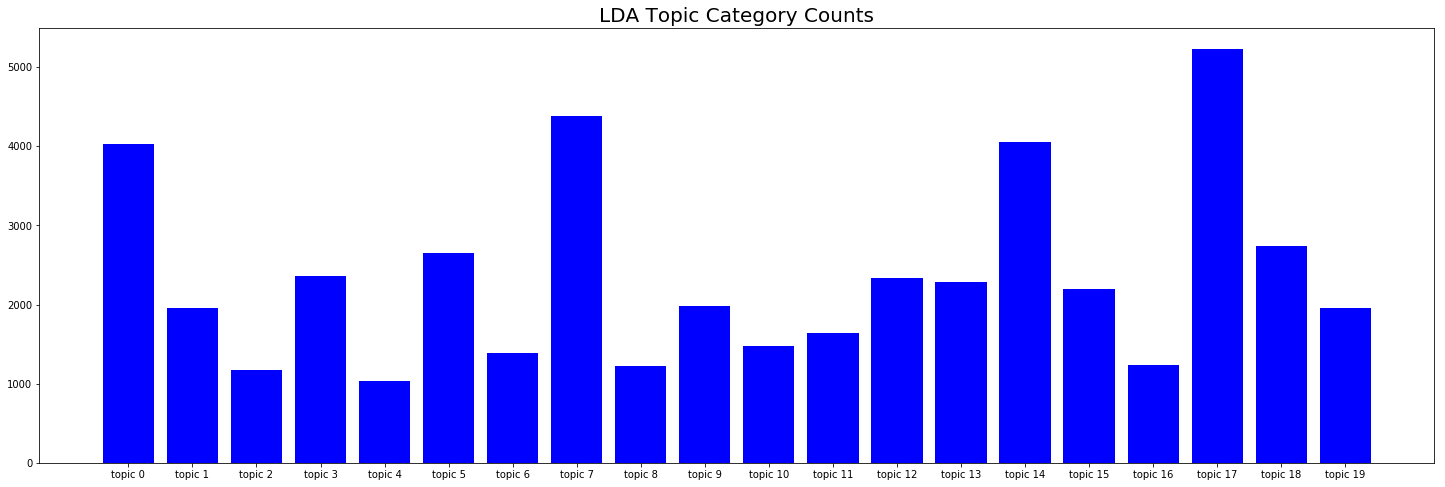

In [0]:
topics_no = []
for i in range(0,20):
    topics_no.append(" ".join(["topic",str(i)]))

graph_count = keys_count.sort_index()

fig, ax = plt.subplots(figsize=(25,8))
for name, count in zip(topics_no,graph_count):
    ax.bar(name,count,color="b")
ax.set_title('LDA Topic Category Counts',fontsize=20)
plt.savefig("topic count.png",bbox_inches='tight')
plt.show()

In [0]:
#Fonction qui retourne le numero de topics correspondant a chaque ligne :
def find_topics_lda(lda_matrix):
    topics = []
    for i in range(0,len(lda_matrix)):
        topics.append(lda_matrix[i].argmax())
    return topics

In [0]:
topics = find_topics_lda(lda_model_matrix)

In [0]:
df_tags = pd.DataFrame(y.toarray())
df_tags.loc[:,"topics"] = topics

In [0]:
topics_tags = df_tags.groupby("topics").sum()

In [0]:
topics_tags_tr = topics_tags.transpose()

In [0]:
#Top 3 tags par topics : 
top_tags_topics = []
for i in range(0,20):
    top_tags_topics.append(topics_tags_tr[i].nlargest(3).index)

In [0]:
#Affichage des 3 tags les plus fréquents par topic.
for i in range(0,20): 
    print("Topic",i,":")
    print("3 tags les plus fréquents sont :")
    print(liste_tags[top_tags_topics[i][0]],liste_tags[top_tags_topics[i][1]],liste_tags[top_tags_topics[i][2]])

Topic 0 :
3 tags les plus fréquents sont :
c# .net java
Topic 1 :
3 tags les plus fréquents sont :
xml c# javascript
Topic 2 :
3 tags les plus fréquents sont :
svn eclipse java
Topic 3 :
3 tags les plus fréquents sont :
c# c++ .net
Topic 4 :
3 tags les plus fréquents sont :
web-services c# .net
Topic 5 :
3 tags les plus fréquents sont :
c# .net java
Topic 6 :
3 tags les plus fréquents sont :
ruby c# ruby-on-rails
Topic 7 :
3 tags les plus fréquents sont :
c# .net java
Topic 8 :
3 tags les plus fréquents sont :
.net c# asp.net
Topic 9 :
3 tags les plus fréquents sont :
sql-server python sql
Topic 10 :
3 tags les plus fréquents sont :
c# .net javascript
Topic 11 :
3 tags les plus fréquents sont :
javascript unit-testing .net
Topic 12 :
3 tags les plus fréquents sont :
c# .net c++
Topic 13 :
3 tags les plus fréquents sont :
asp.net-mvc asp.net c#
Topic 14 :
3 tags les plus fréquents sont :
c# .net java
Topic 15 :
3 tags les plus fréquents sont :
c# .net java
Topic 16 :
3 tags les plus fré

In [0]:
#### Recherche d'un mot par topic : ####
#Matrice de fréquence : 
df_words = pd.DataFrame(X.toarray())
df_words.loc[:,"topics"] = topics

In [0]:
#On choisit le mot le plus important par topic au sens du tf idf (important dans le topic et rare dans les autres)
df_words_topics = df_words.groupby("topics").sum()
words_by_topics = df_words_topics.idxmax(axis=1)

for i in range(0,20):
    print("topic ",i,":",X_vocab[words_by_topics[i]])

topic  0 : language
topic  1 : xml
topic  2 : svn
topic  3 : int
topic  4 : service
topic  5 : exception
topic  6 : button
topic  7 : string
topic  8 : file
topic  9 : sql
topic  10 : foo
topic  11 : test
topic  12 : event
topic  13 : mvc
topic  14 : column
topic  15 : sort
topic  16 : expression
topic  17 : visual
topic  18 : image
topic  19 : php
